<a href="https://colab.research.google.com/github/adbc09/Python-FALL2025/blob/main/Project_1_PYTHON_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project 1**
- NYC Regents Exam Analysis Project
- Goal: Compare the performance of one school to NYC citywide data
- School chosen: Bronx High School of Science
- Exam chosen: Living Environment
- Feature chosen: Mean Score

Importing Libraries.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Loading the dataset.

In [20]:
from google.colab import files

df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')


Exploring the Dataset.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

In [29]:
df.describe()

,Year,Total Tested
count,"212,331.00","212,331.00"
mean,"2,015.96",49.36
std,0.80,93.02
min,"2,015.00",1.00
25%,"2,015.00",5.00
50%,"2,016.00",20.00
75%,"2,017.00",57.00
max,"2,017.00","1,729.00"


In [32]:
df.shape

(212331, 15)

In [33]:
df.dtypes

,0
School DBN,object
School Name,object
School Level,object
Regents Exam,object
Year,int64
Total Tested,int64
Mean Score,object
Number Scoring Below 65,object
Percent Scoring Below 65,object
Number Scoring 65 or Above,object


In [35]:
df.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

In [21]:
df.sample(10)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
44085,24Q550,High School for Arts and Business,High school,Global History and Geography,2016,214,76.4,22,10.3,192,89.7,88,41.1,na,na
193060,25Q525,Townsend Harris High School,High school,Common Core Algebra,2017,9,90.8,0,0,9,100,9,100,9,100
96787,31R064,Gaynor McCown Expeditionary Learning School,High school,Physical Settings/Physics,2016,1,s,s,s,s,s,s,s,na,na
120850,15K051,M.S. 51 William Alexander,Junior High-Intermediate-Middle,Common Core Algebra,2017,66,90.8,0,0,66,100,66,100,66,100
80866,17K528,The High School for Global Citizenship,High school,Global History and Geography,2015,18,51.3,12,66.7,6,33.3,0,0,na,na
177478,16K498,Brooklyn High School for Law and Technology,High school,Physical Settings/Earth Science,2016,3,s,s,s,s,s,s,s,na,na
37610,16K498,Brooklyn High School for Law and Technology,High school,Living Environment,2015,137,74.3,18,13.1,119,86.9,41,29.9,na,na
103470,02M047,47 The American Sign Language and English Seco...,High school,U.S. History and Government,2015,27,69.9,9,33.3,18,66.7,9,33.3,na,na
68217,09X252,Mott Hall Bronx High School,High school,Living Environment,2017,13,63.2,8,61.5,5,38.5,0,0,na,na
62645,05M367,Academy for Social Action,High school,Living Environment,2017,9,s,s,s,s,s,s,s,na,na


In [6]:
df.head(10)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4,3,33.3,6,66.7,0,0,na,na
6,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6,2,13.3,13,86.7,5,33.3,na,na
7,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4,5,55.6,4,44.4,1,11.1,na,na
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1,2,48,98,23,46.9,48,98
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79,9,17.6,42,82.4,33,64.7,40,78.4


In [22]:
df.tail(10)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
212321,84X717,Icahn Charter School,K-8,Common Core Algebra,2016,6,87.2,0,0,6,100,6,100,6,100
212322,84X717,Icahn Charter School,K-8,Common Core Algebra,2017,6,87,0,0,6,100,6,100,6,100
212323,84X717,Icahn Charter School,K-8,Common Core Algebra,2017,6,88.3,0,0,6,100,5,83.3,6,100
212324,84X717,Icahn Charter School,K-8,Living Environment,2015,8,76.5,1,12.5,7,87.5,2,25,na,na
212325,84X717,Icahn Charter School,K-8,Living Environment,2015,6,79.8,0,0,6,100,2,33.3,na,na
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,s,s,s,s,s,s,s,na,na
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,s,s,s,s,s,s,s,na,na
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,s,s,s,na,na
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,s,s,s,na,na
212330,84X717,Icahn Charter School,K-8,U.S. History and Government,2015,1,s,s,s,s,s,s,s,na,na


2. Cleaning Task- Converting score collumn to numeric.

In [16]:
df["Mean Score"] = pd.to_numeric(df["Mean Score"], errors="coerce")

# Filter to only rows for the chosen exam

exam = "Living Environment"
df_exam = df[df["Regents Exam"] == exam].copy()

# Drop rows where score is missing

df_exam = df_exam.dropna(subset=["Mean Score"])

3. School of intertest.

In [12]:
school = "BRONX HIGH SCHOOL OF SCIENCE"

df_school = df_exam[df_exam["School Name"] == school]

# Get the school’s score

school_score = df_school["Mean Score"].mean()

print("School Selected:", school)
print("Exam:", exam)
print("Mean Score:", school_score)

School Selected: BRONX HIGH SCHOOL OF SCIENCE
Exam: Living Environment
Mean Score: nan


4. Comparison : Citywide ean cores for the exam.

In [13]:
city_scores = df_exam["Mean Score"]

# Descriptive statistics

desc_stats = city_scores.describe()
print("\nCitywide Descriptive Statistics:")
print(desc_stats)



Citywide Descriptive Statistics:
count   18,243.00
mean        69.06
std          9.89
min         36.50
25%         62.00
50%         67.80
75%         75.70
max         96.80
Name: Mean Score, dtype: float64


5. Visualization.

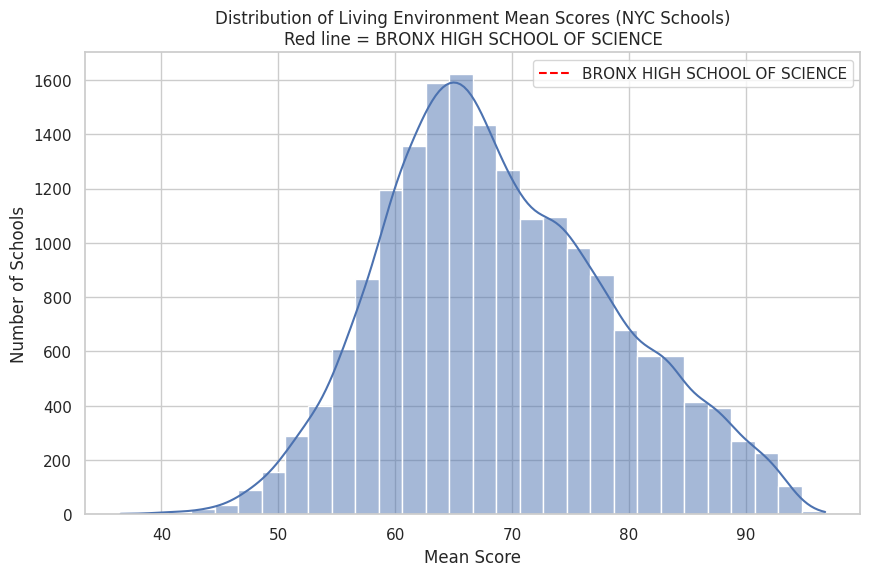

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(city_scores, kde=True, bins=30)
plt.axvline(school_score, color="red", linestyle="--", label=school)
plt.title(f"Distribution of {exam} Mean Scores (NYC Schools)\n"
          f"Red line = {school}")
plt.xlabel("Mean Score")
plt.ylabel("Number of Schools")
plt.legend()
plt.show()


6. Conclusion.

In [15]:
print("\nConclusion:")
print(f"The Bronx High School of Science scored {school_score:.1f} "
      f"on the {exam} exam. This is compared to a citywide mean of "
      f"{desc_stats['mean']:.1f}. The school performs "
      f"{'above' if school_score > desc_stats['mean'] else 'below'} "
      f"the NYC average.")


Conclusion:
The Bronx High School of Science scored nan on the Living Environment exam. This is compared to a citywide mean of 69.1. The school performs below the NYC average.
